# Klasifikasi Support Vector Machine (SVM)

## Import module / package

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"data/tweets_labelled_tokenized_sastrawi.csv")
df2 = pd.read_csv(r"data/tweets_labelled_tokenized_ecs.csv")
df.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['diri', 'di', 'atas', 'kaki', 'sendiri', 'ser...",-2,Negatif
2,"['sebab', 'harga', 'telur', 'anjlok', 'versi',...",5,Positif
3,"['turun', 'minta', 'masyarakat', 'telur', 'aya...",-1,Negatif
4,"['ternak', 'ayam', 'telur', 'aku', 'rugi', 'ra...",5,Positif


In [3]:
df2.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['diri', 'di', 'atas', 'kaki', 'sendiri', 'ser...",-2,Negatif
2,"['sebab', 'harga', 'telur', 'anjlok', 'versi',...",5,Positif
3,"['turun', 'minta', 'masyarakat', 'telur', 'aya...",-1,Negatif
4,"['ternak', 'ayam', 'telur', 'menga', 'rugi', '...",4,Positif


## Split Data (Test & Train)

In [4]:
train_X_df, test_X_df, train_Y_df, test_Y_df = model_selection.train_test_split(df['tweet'], df['sentimen'], test_size = 0.1, random_state = 42)
train_X_df2, test_X_df2, train_Y_df2, test_Y_df2 = model_selection.train_test_split(df2['tweet'], df2['sentimen'], test_size = 0.1, random_state = 42)

In [5]:
data_train = pd.DataFrame()
data_train['tweet'] = train_X_df
data_train['sentimen'] = train_Y_df

data_test = pd.DataFrame()
data_test['tweet'] = test_X_df
data_test['sentimen'] = test_Y_df

data_train_2 = pd.DataFrame()
data_train_2['tweet'] = train_X_df2
data_train['sentimen'] = train_Y_df2

data_test_2 = pd.DataFrame()
data_test_2['tweet'] = test_X_df2
data_test_2['sentimen'] = test_Y_df2

In [6]:
# data_train.to_csv(r"df_trainsvm.csv")
# data_test.to_csv(r"df_testsvm.csv")

## TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

datatfidf = TfidfVectorizer(max_features = 5000)
datatfidf.fit(df['tweet'].values.astype('U'))
train_X_datatfidf = datatfidf.transform(data_train['tweet'].values.astype('U'))
test_X_datatfidf = datatfidf.transform(data_test['tweet'].values.astype('U'))

datatfidf2 = TfidfVectorizer(max_features = 5000)
datatfidf2.fit(df2['tweet'].values.astype('U'))
train_X_datatfidf2 = datatfidf2.transform(data_train_2['tweet'].values.astype('U'))
test_X_datatfidf2 = datatfidf2.transform(data_test_2['tweet'].values.astype('U'))

In [8]:
datatfidf

TfidfVectorizer(max_features=5000)

In [9]:
datatfidf2

TfidfVectorizer(max_features=5000)

In [10]:
# print(test_X_datatfidf)

In [11]:
# print(test_X_datatfidf2)

In [12]:
# print(train_X_datatfidf)

In [13]:
# print(train_X_datatfidf2)

In [14]:
print(test_X_datatfidf.shape)
print(train_X_datatfidf.shape)
print(test_X_datatfidf2.shape)
print(train_X_datatfidf2.shape)

(288, 5000)
(2591, 5000)
(288, 5000)
(2591, 5000)


## Klasifikasi SVM (Kernel Linear)

In [15]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model2 = SVC(kernel='linear')
model.fit(train_X_datatfidf,train_Y_df)
model2.fit(train_X_datatfidf2,train_Y_df2)

SVC(kernel='linear')

In [16]:
from sklearn.metrics import accuracy_score

predictionsSVM = model.predict(test_X_datatfidf)
predictionsSVM2 = model2.predict(test_X_datatfidf2)

test_prediction = pd.DataFrame()
test_prediction['tweet'] = test_X_df
test_prediction['sentimen'] = predictionsSVM
test_prediction_2 = pd.DataFrame()
test_prediction_2['tweet'] = test_X_df2
test_prediction_2['sentimen'] = predictionsSVM2

SVMaccuracy = accuracy_score(predictionsSVM, test_Y_df)*100
SVMaccuracy = round(SVMaccuracy,1)
SVMaccuracy2 = accuracy_score(predictionsSVM2, test_Y_df2)*100
SVMaccuracy2 = round(SVMaccuracy2,1)

## Mengecek Akurasi

### Dataset DF (_Stemming Nazief_)

In [17]:
print("Akurasi SVM : ",SVMaccuracy, "%")

Akurasi SVM :  90.6 %


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine Acuracy:", accuracy_score(test_Y_df, predictionsSVM)*100, "%")
print("Support Vector Machine Precision:", precision_score(test_Y_df, predictionsSVM, average="binary", pos_label="Positif")*100, "%")
print("Support Vector Machine Recall:", recall_score(test_Y_df, predictionsSVM, average="binary", pos_label="Positif")*100, "%")
print("Support Vector Machine f1_score:", f1_score(test_Y_df, predictionsSVM, average="binary", pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df, predictionsSVM))

Support Vector Machine Acuracy: 90.625 %
Support Vector Machine Precision: 91.53225806451613 %
Support Vector Machine Recall: 97.42489270386267 %
Support Vector Machine f1_score: 94.38669438669439 %

              precision    recall  f1-score   support

     Negatif       0.85      0.62      0.72        55
     Positif       0.92      0.97      0.94       233

    accuracy                           0.91       288
   macro avg       0.88      0.80      0.83       288
weighted avg       0.90      0.91      0.90       288



Support Vector Machine Acuracy: 90.6 %


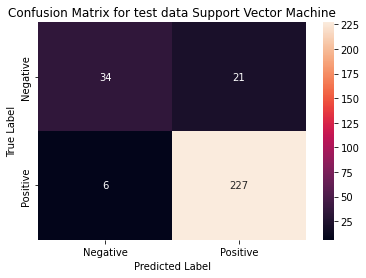

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy, "%")

conf_mat = confusion_matrix(test_Y_df, predictionsSVM)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dataset DF2 (_Stemming ECS_)

In [20]:
print("Akurasi SVM : ",SVMaccuracy2, "%")

Akurasi SVM :  89.6 %


In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Support Vector Machine Acuracy:", accuracy_score(test_Y_df2, predictionsSVM2)*100, "%")
print("Support Vector Machine Precision:", precision_score(test_Y_df2, predictionsSVM2, average="binary", pos_label="Positif")*100, "%")
print("Support Vector Machine Recall:", recall_score(test_Y_df2, predictionsSVM2, average="binary", pos_label="Positif")*100, "%")
print("Support Vector Machine f1_score:", f1_score(test_Y_df2, predictionsSVM2, average="binary", pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df2, predictionsSVM))

Support Vector Machine Acuracy: 89.58333333333334 %
Support Vector Machine Precision: 90.2834008097166 %
Support Vector Machine Recall: 97.37991266375546 %
Support Vector Machine f1_score: 93.69747899159664 %

              precision    recall  f1-score   support

     Negatif       0.85      0.58      0.69        59
     Positif       0.90      0.97      0.94       229

    accuracy                           0.89       288
   macro avg       0.87      0.78      0.81       288
weighted avg       0.89      0.89      0.88       288



Support Vector Machine Acuracy: 90.6 %


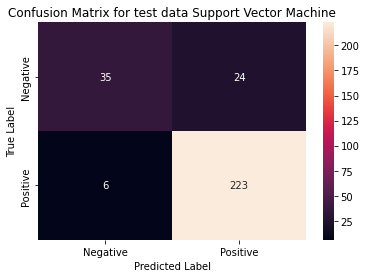

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy, "%")

conf_mat = confusion_matrix(test_Y_df2, predictionsSVM2)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Klasifikasi SVM (Kernel RBF)

In [23]:
from sklearn.svm import SVC
model_rbf = SVC(random_state=42, kernel='rbf')
model2_rbf = SVC(random_state=42, kernel='rbf')
model_rbf.fit(train_X_datatfidf,train_Y_df)
model2_rbf.fit(train_X_datatfidf2,train_Y_df2)

SVC(random_state=42)

In [24]:
from sklearn.metrics import accuracy_score

predictionsSVM_rbf = model_rbf.predict(test_X_datatfidf)
predictionsSVM2_rbf = model2_rbf.predict(test_X_datatfidf2)

test_prediction_rbf = pd.DataFrame()
test_prediction_rbf['tweet'] = test_X_df
test_prediction_rbf['sentimen'] = predictionsSVM_rbf
test_prediction_2_rbf = pd.DataFrame()
test_prediction_2_rbf['tweet'] = test_X_df2
test_prediction_2_rbf['sentimen'] = predictionsSVM2_rbf

SVMaccuracy_rbf = accuracy_score(predictionsSVM_rbf, test_Y_df)*100
SVMaccuracy_rbf = round(SVMaccuracy_rbf,1)
SVMaccuracy2_rbf = accuracy_score(predictionsSVM2_rbf, test_Y_df2)*100
SVMaccuracy2_rbf = round(SVMaccuracy2_rbf,1)

## Mengecek Akurasi

### Dataset DF (_Stemming Nazief_)

In [25]:
print("Akurasi SVM RBF DF : ",SVMaccuracy_rbf, "%")

Akurasi SVM RBF DF :  87.5 %


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM RBF DF Acuracy:", accuracy_score(test_Y_df, predictionsSVM_rbf)*100, "%")
print("SVM RBF DF Precision:", precision_score(test_Y_df, predictionsSVM_rbf, average="binary", pos_label="Positif")*100, "%")
print("SVM RBF DF Recall:", recall_score(test_Y_df, predictionsSVM_rbf, average="binary", pos_label="Positif")*100, "%")
print("SVM RBF DF f1_score:", f1_score(test_Y_df, predictionsSVM_rbf, average="binary", pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df, predictionsSVM_rbf))

SVM RBF DF Acuracy: 87.5 %
SVM RBF DF Precision: 88.03088803088804 %
SVM RBF DF Recall: 97.85407725321889 %
SVM RBF DF f1_score: 92.6829268292683 %

              precision    recall  f1-score   support

     Negatif       0.83      0.44      0.57        55
     Positif       0.88      0.98      0.93       233

    accuracy                           0.88       288
   macro avg       0.85      0.71      0.75       288
weighted avg       0.87      0.88      0.86       288



Support Vector Machine Acuracy: 87.5 %


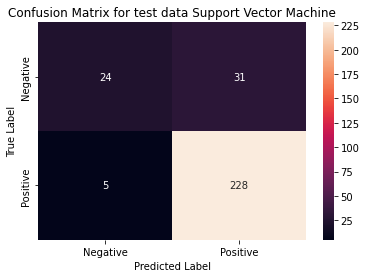

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy_rbf, "%")

conf_mat = confusion_matrix(test_Y_df, predictionsSVM_rbf)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Dataset DF2 (_Stemming ECS_)

In [28]:
print("Akurasi SVM RBF DF2 : ",SVMaccuracy2_rbf, "%")

Akurasi SVM RBF DF2 :  86.8 %


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("SVM RBF DF2 Acuracy:", accuracy_score(test_Y_df2, predictionsSVM2_rbf)*100, "%")
print("SVM RBF DF2 Precision:", precision_score(test_Y_df2, predictionsSVM2_rbf, average="binary", pos_label="Positif")*100, "%")
print("SVM RBF DF2 Recall:", recall_score(test_Y_df2, predictionsSVM2_rbf, average="binary", pos_label="Positif")*100, "%")
print("SVM RBF DF2 f1_score:", f1_score(test_Y_df2, predictionsSVM2_rbf, average="binary", pos_label="Positif")*100, "%")
print('====================================================\n')
print (classification_report(test_Y_df2, predictionsSVM_rbf))

SVM RBF DF2 Acuracy: 86.80555555555556 %
SVM RBF DF2 Precision: 87.15953307392996 %
SVM RBF DF2 Recall: 97.81659388646288 %
SVM RBF DF2 f1_score: 92.18106995884773 %

              precision    recall  f1-score   support

     Negatif       0.86      0.42      0.57        59
     Positif       0.87      0.98      0.92       229

    accuracy                           0.87       288
   macro avg       0.87      0.70      0.75       288
weighted avg       0.87      0.87      0.85       288



Support Vector Machine Acuracy: 86.8 %


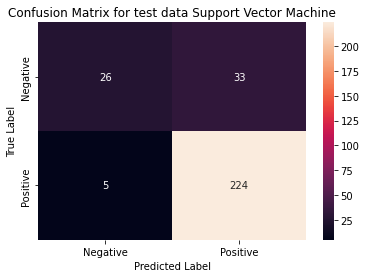

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Support Vector Machine Acuracy:", SVMaccuracy2_rbf, "%")

conf_mat = confusion_matrix(test_Y_df2, predictionsSVM2_rbf)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()